# Exercises

There are three exercises in this notebook:

1. Use the cross-validation method to test the linear regression with different $\alpha$ values, at least three.
2. Implement a SGD method that will train the Lasso regression for 10 epochs.
3. Extend the Fisher's classifier to work with two features. Use the class as the $y$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## 1. Cross-validation linear regression

You need to change the variable ``alpha`` to be a list of alphas. Next do a loop and finally compare the results.

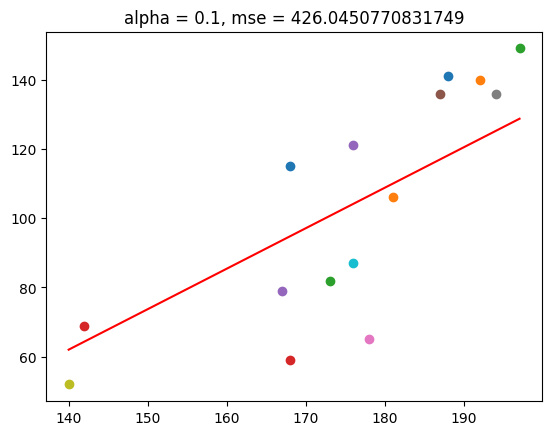

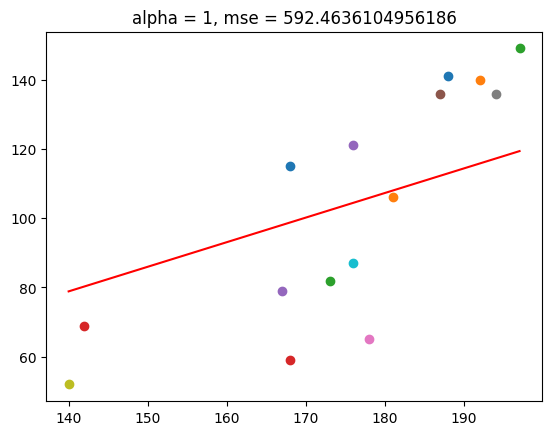

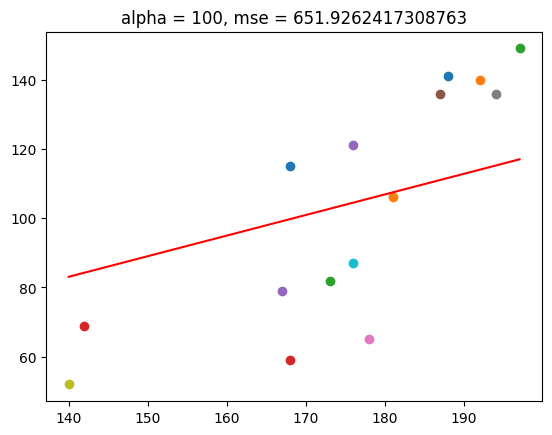

In [ ]:
x_ = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)),x_])

I = np.identity(2)
alphas = [0.1, 1, 100]

for alpha in alphas:
    w = np.linalg.inv(x.T*x + alpha * I)*x.T*y
    w=w.ravel()

    for i in range(15):
        plt.scatter(x_[i], y[i])

    x_line = np.linspace(x_.min(), x_.max(), 100)
    plt.plot(x_line, w[0,1]*x_line + w[0,0], color='red')
    y_pred_train = w[0,1]*x_ + w[0,0]
    plt.title(f"alpha = {alpha}, mse = {np.mean((y - y_pred_train)**2)}")

    plt.show()



## 2. Implement based on the Ridge regression example, the Lasso regression.

Please implement the SGD method and compare the results with the sklearn Lasso regression results. 

In [ ]:
def sgd(x, y):
    w = np.zeros((x.shape[1], 1))
    epochs = 10
    lr = 1e-6
    n = x.shape[0]
    for epoch in range(epochs):
        for i in range(n):
            xi = x[i, :]
            yi = y[i]
            pred = xi * w
            error = pred - yi
            gradient = xi.T * error
            gradient[1, 0] += alpha * np.sign(w[1, 0])
            w = w - lr * gradient
    return w

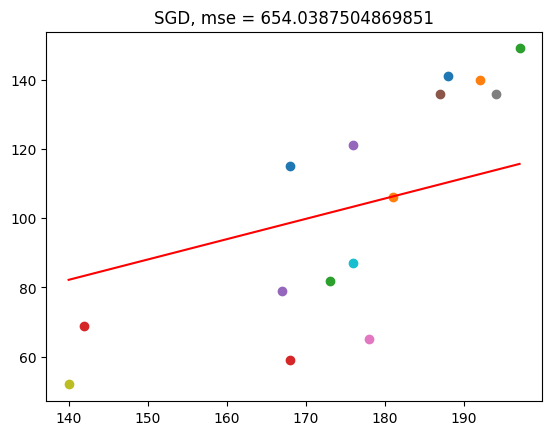

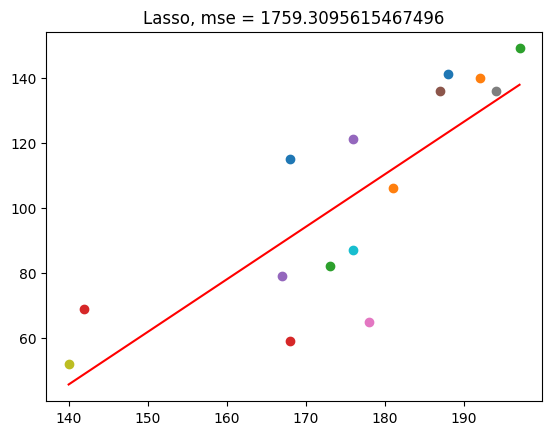

[[0.00307599]
 [0.58719138]]


In [50]:
from sklearn.linear_model import Lasso

x_ = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)),x_])

I = np.identity(2)
alpha = 0.1 

w = sgd(x, y)
for i in range(15):
    plt.scatter(x_[i], y[i])
x_line = np.linspace(x_.min(), x_.max(), 100)
plt.plot(x_line, w[1,0]*x_line + w[0,0], color='red')
y_pred_train = w[1,0]*x_ + w[0,0]
plt.title(f"SGD, mse = {np.mean((y - y_pred_train)**2)}")
plt.show()

lasso_regression = Lasso(alpha=alpha)
lasso_regression.fit(X=x_, 
                      y=y)

t = lasso_regression.predict(X=x_)
x_line = np.linspace(x_.min(), x_.max(), 100)
for i in range(15):
    plt.scatter(x_[i], y[i])

plt.plot(x_line, lasso_regression.intercept_ + lasso_regression.coef_[0] * x_line, color='red')
plt.title(f"Lasso, mse = {np.mean((y - t)**2)}")
plt.show()
print(w)
w=w.ravel()


## 3. Extend the Fisher's classifier

Please extend the targets of the ``iris_data`` variable and use it as the $y$.

ValueError: x and y must be the same size

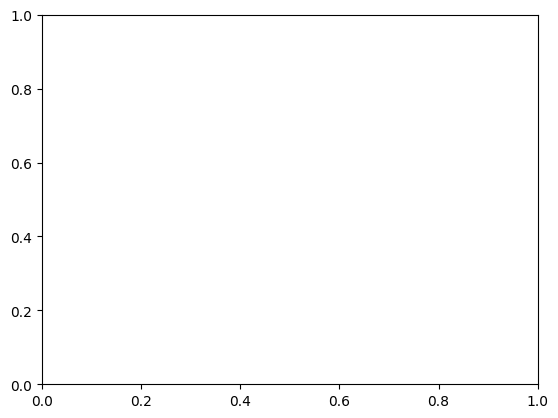

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris_df.head()

x = iris_df[['sepal width (cm)', 'sepal length (cm)']].values
y = pd.DataFrame(iris_data.target).values

dataset_size = np.size(x)

mean_x, mean_y = np.mean(x), np.mean(y)

SS_xy = np.sum(y * x) - dataset_size * mean_y * mean_x
SS_xx = np.sum(x * x) - dataset_size * mean_x * mean_x

a = SS_xy / SS_xx
b = mean_y - a * mean_x


y_pred = a * x + b



final = pd.DataFrame(y_pred, columns=["", ""])
final